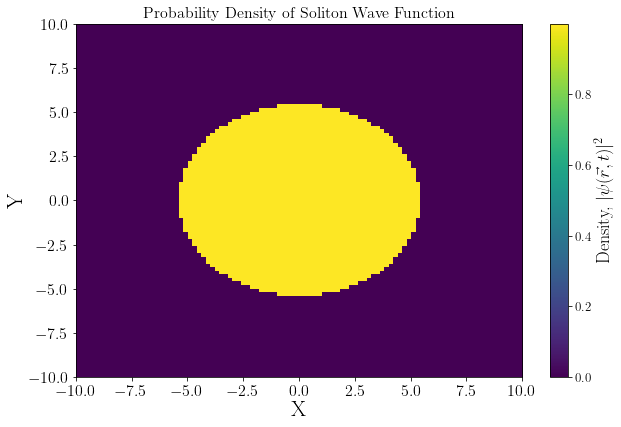

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

f = np.load('initial_f.npy')


def initsoliton(funct, xarray, yarray, zarray, position, alpha, f, delta_x):
    for index in np.ndindex(funct.shape):
        # Note also that this distfromcentre is here to calculate the distance of every gridpoint from the centre of the soliton, not to calculate the distance of the soliton from the centre of the grid
        distfromcentre = (
            (xarray[index] - position[0]) ** 2 +
            (yarray[index] - position[1]) ** 2 +
            (zarray[index] - position[2]) ** 2
        ) ** 0.5
        # Utilises soliton profile array out to dimensionless radius 5.6.
        if (np.sqrt(alpha) * distfromcentre <= 5.6):
            funct[index] = alpha * f[int(np.sqrt(alpha) * (distfromcentre / delta_x + 1))]

        else:
            funct[index] = 0
    return funct



def plot_soliton(length, resol, position, alpha, f):
    xarray = np.linspace(-length, length, resol)
    yarray = np.linspace(-length, length, resol)
    zarray = np.linspace(-length, length, 90)
    xarray, yarray, zarray = np.meshgrid(xarray, yarray, zarray, indexing='ij')
    funct = np.zeros((resol, resol, 90), dtype=complex)
    delta_x = xarray[1, 0, 0] - xarray[0, 0, 0]  # Assuming uniform spacing
    funct = initsoliton(funct, xarray, yarray, zarray, position, alpha, f, delta_x)
    z_index = resol // 2
    psi_slice = funct[:, :, z_index]

    
    fig, ax = plt.subplots(1, figsize=(10, 6.5))
    cax = ax.imshow(np.abs(psi_slice)**2, extent=(-length, length, -length, length), origin='lower', aspect='auto', interpolation='nearest')
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=13)
    cbar.set_label(label=r'Density, $|\psi(\vec{r}, t)|^{2}$', size=18)
    plt.xlabel('X', fontsize=22, labelpad=2)
    plt.ylabel('Y', fontsize=22, labelpad=2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('Probability Density of Soliton Wave Function', fontsize=16)

    
    plt.savefig("density_noPBH.pdf", bbox_inches='tight')
    plt.show()  

    
#parameters of solitons as per choice
length = 10
resol = 100
r = 0
position = [r, 0, 0]  #position of the soliton
alpha = 1.0    
plot_soliton(length, resol, position, alpha, f)